In [2]:
# Import dependencies
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
# Load merged/cleaned dataset
crime_df = pd.read_csv("../../Data/cleaned_data/cleaned_data_2015_2018/all_data_merged_cleaned_2015_2018.csv")
crime_df.head()

,EVENT_UNIQUE_ID,CRIME,OCC_YEAR,OCC_MONTH,OCC_DAY,OCC_DOW,OCC_HOUR,PREMISES_TYPE,HOOD_140,NEIGHBOURHOOD_140,LONG_WGS84,LAT_WGS84,OCC_DATETIME
0,GO-20155154,assault,2015,January,1,Thursday,23,House,115,Mount Dennis (115),-79.504668,43.693238,2015-01-01
1,GO-20151233,assault,2015,January,1,Thursday,3,Commercial,77,Waterfront Communities-The Island (77),-79.392855,43.647315,2015-01-01
2,GO-2015862,assault,2015,January,1,Thursday,2,Commercial,77,Waterfront Communities-The Island (77),-79.387700,43.649776,2015-01-01
3,GO-2015182,assault,2015,January,1,Thursday,0,Commercial,1,West Humber-Clairville (1),-79.595562,43.686751,2015-01-01
4,GO-2015276,assault,2015,January,1,Thursday,0,Outside,77,Waterfront Communities-The Island (77),-79.400096,43.645835,2015-01-01


In [6]:
# How many different crime types in df? 
crime_df["CRIME"].nunique()

10

In [7]:
# Any null values in rows?
crime_df.isnull().sum()

CRIME                   0
OCC_YEAR                0
OCC_MONTH               0
OCC_DAY                 0
OCC_DOW                 0
OCC_HOUR                0
PREMISES_TYPE        1811
HOOD_140                0
NEIGHBOURHOOD_140       0
LONG_WGS84              0
LAT_WGS84               0
OCC_DATETIME            0
dtype: int64

In [8]:
# Look at PREMISES_TYPE column with null values
crime_df[crime_df["PREMISES_TYPE"].isna()]

,CRIME,OCC_YEAR,OCC_MONTH,OCC_DAY,OCC_DOW,OCC_HOUR,PREMISES_TYPE,HOOD_140,NEIGHBOURHOOD_140,LONG_WGS84,LAT_WGS84,OCC_DATETIME
134969,shooting,2015,July,1,Wednesday,4,NaN,107,Oakwood Village (107),-79.440752,43.697311,2015-07-01 04:00:00
134970,shooting,2015,December,31,Thursday,18,NaN,26,Downsview-Roding-CFB (26),-79.482066,43.726636,2015-12-31 18:00:00
134971,shooting,2015,March,23,Monday,2,NaN,14,Islington-City Centre West (14),-79.564077,43.652450,2015-03-23 02:00:00
134972,shooting,2015,July,11,Saturday,12,NaN,22,Humbermede (22),-79.542128,43.750842,2015-07-11 12:00:00
134973,shooting,2015,May,24,Sunday,4,NaN,98,Rosedale-Moore Park (98),-79.383542,43.693791,2015-05-24 04:00:00
...,...,...,...,...,...,...,...,...,...,...,...,...
480898,homicide,2018,December,6,Thursday,0,NaN,73,Moss Park (73),-79.374451,43.660196,2018-12-06 00:00:00
480899,homicide,2018,December,12,Wednesday,0,NaN,6,Kingsview Village-The Westway (6),-79.548672,43.701318,2018-12-12 00:00:00
480900,homicide,2018,December,18,Tuesday,0,NaN,24,Black Creek (24),-79.517771,43.759010,2018-12-18 00:00:00
480901,homicide,2018,December,19,Wednesday,0,NaN,77,Waterfront Communities-The Island (77),-79.397643,43.644948,2018-12-19 00:00:00


In [9]:
# Look at overall shape of dataset
# 1,811 null values out of 480,903 rows for PREMISES_TYPE
crime_df.shape

(480903, 12)

In [10]:
# Find date range of dataset
crime_df["OCC_DATETIME"].min()

'2015-01-01 00:00:00'

In [11]:
crime_df["OCC_DATETIME"].max()

'2018-12-31 23:00:00'

In [12]:
# How many different neighbourhoods in this dataset? 
crime_df["NEIGHBOURHOOD_140"].nunique()

144

<AxesSubplot:>

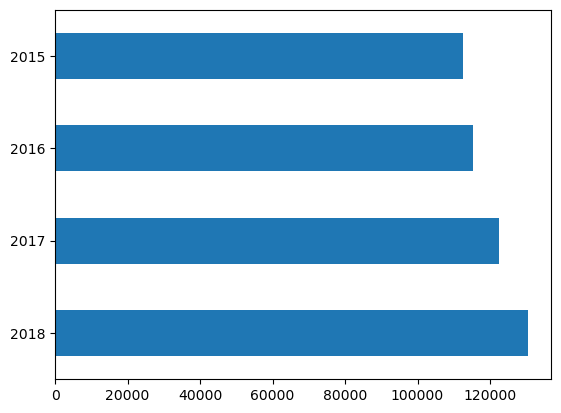

In [13]:
# Nbr of crimes by year
crime_df["OCC_YEAR"].value_counts().plot(kind="barh")

<AxesSubplot:>

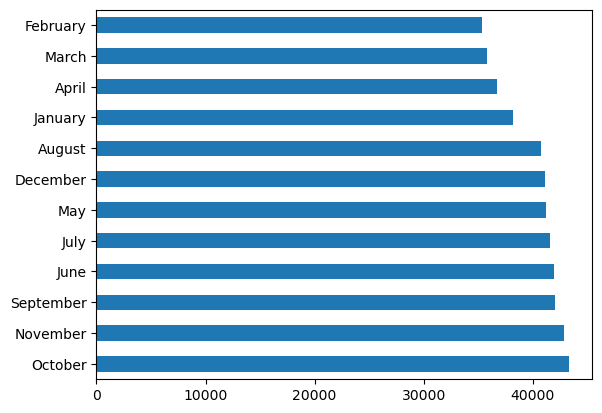

In [14]:
# Nbr of crimes per month (across all years)
crime_df["OCC_MONTH"].value_counts().plot(kind="barh")


In [15]:
crime_counts = crime_df["CRIME"].value_counts()
crime_counts

traffic_collision           290376
assault                      76777
theft_from_motor_vehicle     34109
break_and_enter              27945
robbery                      15163
auto_theft                   15084
bicycle_theft                15077
theft_over                    4561
shooting                      1514
homicide                       297
Name: CRIME, dtype: int64

In [16]:
labels = ["traffic_collision", "assault", "theft_from_motor_vehicle", "break_and_enter", "robbery", "auto_theft", "bicycle_theft", "theft_over", "shooting", "homicide"]

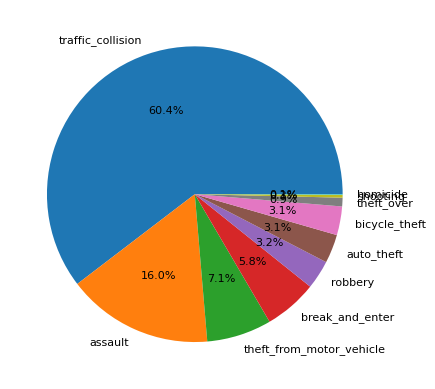

In [17]:
# Pie chart of nbr of crimes by type 
plt.pie(crime_df["CRIME"].value_counts(), labels = labels, textprops={'fontsize': 8}, autopct='%1.1f%%')
plt.show()

# Consider removing traffic collisions? Obvious that they will be influenced by weather. 

In [4]:
# Explore weather data 
weather_df = pd.read_csv("../cleaned_data_2015_2018/toronto_daily_weather_2015_2018.csv")
weather_df.head()

,date,max_temperature,min_temperature,max_relative_humidity,avg_relative_humidity,avg_pressure_sea,max_wind_speed,precipitation,rain,snow,snow_on_ground,daylight,avg_cloud_cover_8
0,2018-12-31,5.0,-2.5,94,79.5,100.78,21,13.6,13.6,0.0,0.0,8.98,4.5
1,2018-12-30,0.7,-6.6,88,78.0,102.03,24,1.2,0.0,1.6,2.0,8.97,5.0
2,2018-12-29,2.7,-7.0,80,68.0,101.86,34,0.0,0.0,0.0,0.0,8.95,4.5
3,2018-12-28,12.4,2.7,95,84.5,100.89,30,1.8,1.8,0.0,0.0,8.93,4.5
4,2018-12-27,2.8,-7.4,87,74.0,102.52,30,5.4,5.4,0.0,0.0,8.93,4.0


In [25]:
# How big is dataset
weather_df.shape

(1461, 13)

In [26]:
# Max temp in Toronto
weather_df["max_temperature"].max()

36.0

In [27]:
# Min temp in Toronto
weather_df["min_temperature"].min()

-26.3

In [28]:
# How many blanks 
weather_df.isnull().sum()

date                     0
max_temperature          0
min_temperature          0
max_relative_humidity    0
avg_relative_humidity    0
avg_pressure_sea         0
max_wind_speed           0
precipitation            0
rain                     0
snow                     0
snow_on_ground           0
daylight                 0
avg_cloud_cover_8        0
dtype: int64